# Decision Trees and Random Forests

# Decision Tree
Descision trees are graphs that split at values in our feature vectors to capture elements into groups and eventually provide a classification. They're major benefit is that they are easy to read and understand. Both decision trees and random forests can use quantitiative or categorical data for both the target and the features. 


### Properties 
1. Decision trees are are easy to interpret and can be a great tool for data exploration


### Limitations
1. Decision trees involve the greedy and exhaustive selection of the best split point from the dataset at each step. This algorithim makes decision trees susceptible to high variance if they are not pruned.
2. Decision trees are fragile to changes in values and lack reproducability- for that reason they are not as useful for prediction. 


### Psuedo Code
1. The algorithim that decides the split point for decision trees is an exhaustive, greedy algorithim that computes a gini impurity value for every possible value, and chooses the best one.
2. Gini impurity is a standard measure of misclassification used to measure the homogeneity of groups and therefore the quality of a point used to split our tree.

>Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Gini impurity can be computed by summing the probability 

$p_{i}$ of an item with label ${i}$ being chosen times the probability $1-p_{i}$ of a mistake in categorizing that item. 

>It reaches its minimum (zero) when all cases in the node fall into a single target category.

3. After choosing the point with the best gini impurity the algorithm continues recursively to split data according to the correct point- make sure to check for situations where a split point partitions all of the data onto one side, and have a condition to insure terminal nodes. 


# Random Forests

Random forest are designed to address the failures of decision trees. 
Decision trees are subject to changes in structure due to small changes in the data and sensitivity to intial splitting decisions. A way to deal with the weaknesses of decision trees are to use **bagging** or **bootstrap aggregating** or resampling with replacement- to generate random forests, deicison trees born from resampling where the split points are chosen from a constrained set of the feature vectors. 

Assume there is one particular feature in the dataset. A feature that is really strong at predicting a certain class. This can lead to many trees that are highly coorelated and mitigating the variance that was sought. By randomly leaving out features from each split random forest decorrelates the trees, such that the avarging process can reduce the variance of the resulting model. 

### Properties 


### Limitaitons



## Psuedo Code
1. Each time a split is considered, a random smaple of $m$ features is chosen as a candidate from the full set of $p$ features. The split is only allowed to use one of those $m$ features. A new random sample of features is chosen from every single tree at every single split. For classification $m$ is usually chosen to be the square root of $p$



In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('kyphosis.csv')
#df.head()
#df.info()

In [6]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

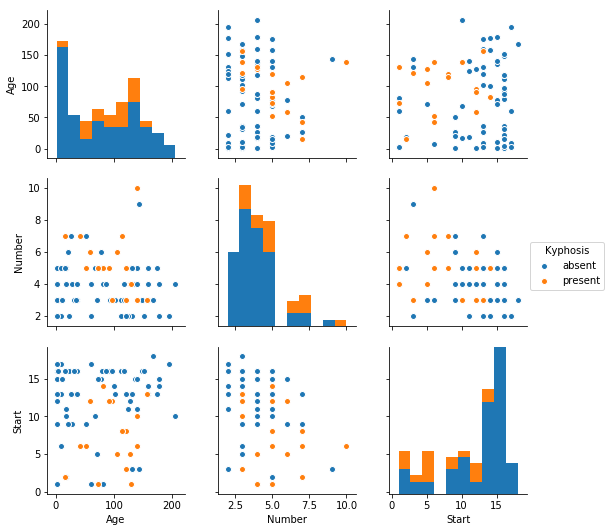

In [9]:
sns.pairplot(data = df, hue = 'Kyphosis')

In [10]:
from sklearn.model_selection import train_test_split
x = df.drop('Kyphosis', axis = 1)
y = df['Kyphosis']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
predictions = dtree.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[12  5]
 [ 6  2]]


             precision    recall  f1-score   support

     absent       0.67      0.71      0.69        17
    present       0.29      0.25      0.27         8

avg / total       0.54      0.56      0.55        25



In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc. fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
rfc_pred = rfc.predict(x_test)

In [17]:
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[17  0]
 [ 6  2]]


             precision    recall  f1-score   support

     absent       0.74      1.00      0.85        17
    present       1.00      0.25      0.40         8

avg / total       0.82      0.76      0.71        25



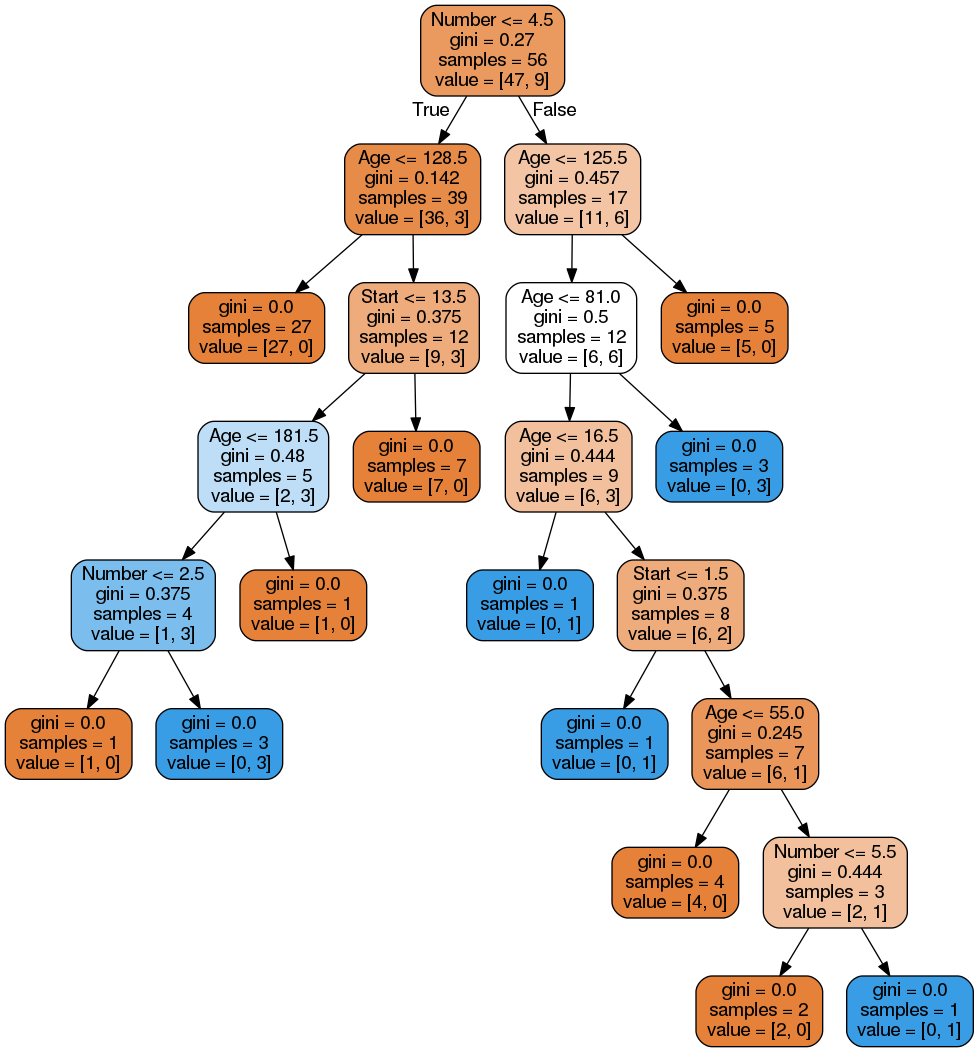

In [18]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

A random forest will basically always do better than a single decision tree, in this case there is a small sample size so the difference is not very noticeable. In addition there the label amounts are not symmetrical . 